Group 4: June to November

Karnataka, Madhya Pradesh, Odisha

In [11]:
import pandas as pd
import plotly.graph_objects as go

s = ['Karnataka', 'Madhya Pradesh', 'Odisha']

for st in s:
    df = pd.read_csv('../states/'+ st+'.csv')
    districts = sorted(df['District'].unique())
    print(st)
    print(districts)
    fig = go.Figure()

    # Read the dataset and add traces
    for i in districts:
        data = pd.read_csv('../districts/'+i+'.csv',parse_dates= True)
        data = data.sort_values(by="Date", ascending=True)
        yearly_sum = data.groupby('Year')['Avg_rainfall'].sum()
        fig.add_trace(go.Scatter(x=yearly_sum.index, y=yearly_sum.values, mode='lines+markers', name=i, visible='legendonly'))
    

    years = list(range(int(min(yearly_sum.index)), int(max(yearly_sum.index)) + 1, 1))  # Adjust the range and step as needed1
    fig.update_xaxes(tickmode='array', tickvals=years, ticktext=years)

    # Update layout
    fig.update_layout(
        title=st,
        xaxis=dict(title='Year', showgrid=True, gridwidth=1, gridcolor='lightgray'),
        yaxis=dict(title='Average Rainfall in mm', showgrid=True, gridwidth=1, gridcolor='lightgray'),
        legend=dict(x=1.05, y=1, traceorder='normal'),
        margin=dict(l=0, r=0, t=50, b=0),
        plot_bgcolor='white'
    )
    fig.update_layout(
        legend=dict(
            tracegroupgap=0,
        ),
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(label="All",
                        method="update",
                        args=[{"visible": [True] * len(districts)},
                            {"title": "All Districts"}]),
                    dict(label="None",
                        method="update",
                        args=[{"visible": [False] * len(districts)},
                            {"title": "No District"}])
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.05,
                xanchor="left",
                y=1.15,
                yanchor="top"
            ),
        ]
    )

    def create_legend_callback(index):
        def callback(trace, points, selector):
            for i in range(len(fig.data)):
                if i == index:
                    fig.data[i].visible = True
                else:
                    fig.data[i].visible = False
        return callback

    for i, _ in enumerate(fig.data):
        fig.data[i].on_click(create_legend_callback(i))



    fig.show()


Karnataka
['Bagalkote', 'Ballari', 'Belagavi', 'Bengaluru Rural', 'Bengaluru Urban', 'Bidar', 'Chamarajanagara', 'Chikkaballapura', 'Chikkamagaluru', 'Chitradurga', 'Dakshina Kannada', 'Davangere', 'Dharwad', 'Gadag', 'Hassan', 'Haveri', 'Kalaburagi', 'Kodagu', 'Kolar', 'Koppal', 'Mandya', 'Mysuru', 'Raichur', 'Ramanagara', 'Shivamogga', 'Tumakuru', 'Udupi', 'Uttara Kannada', 'Vijayapura', 'Yadgir']


Madhya Pradesh
['Agar Malwa', 'Alirajpur', 'Anuppur', 'Ashoknagar', 'Balaghat', 'Barwani', 'Betul', 'Bhind', 'Bhopal', 'Burhanpur', 'Chhatarpur', 'Chhindwara', 'Damoh', 'Datia', 'Dewas', 'Dhar', 'Dindori', 'East Nimar', 'Guna', 'Gwalior', 'Harda', 'Hoshangabad', 'Indore', 'Jabalpur', 'Jhabua', 'Katni', 'Khargone', 'Mandla', 'Mandsaur', 'Morena', 'Narsinghpur', 'Neemuch', 'Niwari', 'Panna', 'Raisen', 'Rajgarh', 'Ratlam', 'Rewa', 'Sagar', 'Satna', 'Sehore', 'Seoni', 'Shahdol', 'Shajapur', 'Sheopur', 'Shivpuri', 'Sidhi', 'Singrauli', 'Tikamgarh', 'Ujjain', 'Umaria', 'Vidisha']


Odisha
['Anugul', 'Balangir', 'Baleshwar', 'Bargarh', 'Bhadrak', 'Boudh', 'Cuttack', 'Deogarh', 'Dhenkanal', 'Gajapati', 'Ganjam', 'Jagatsinghapur', 'Jajapur', 'Jharsuguda', 'Kalahandi', 'Kandhamal', 'Kendrapara', 'Kendujhar', 'Khordha', 'Koraput', 'Malkangiri', 'Mayurbhanj', 'Nabarangpur', 'Nayagarh', 'Nuapada', 'Puri', 'Rayagada', 'Sambalpur', 'Sonepur', 'Sundargarh']


Combined Plot

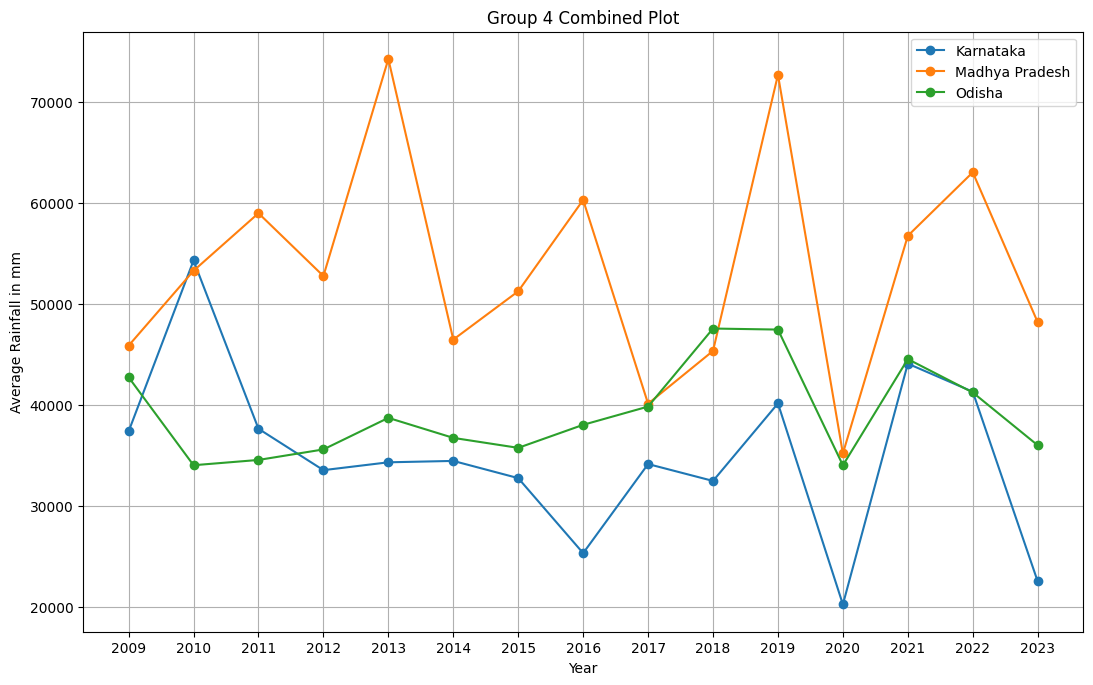

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6), dpi = 100)
ax = fig.add_axes([0,0,1,1])
states = ['Karnataka', 'Madhya Pradesh', 'Odisha']
fy= [2013, 2019]
# Read the dataset
for i in states:
    data = pd.read_csv('../states_cumulative/'+i+'.csv',parse_dates= True)
    data = data.sort_values(by="Date", ascending=True)
    yearly_sum = data.groupby('Year')['Average'].sum()
    plt.plot(yearly_sum.index, yearly_sum.values, marker='o', linestyle='-', label = i)
    plt.xticks(yearly_sum.index)

ax.set_xlabel('Year')
ax.set_ylabel('Average Rainfall in mm')
ax.grid(True)
ax.set_title('Group 4 Combined Plot')
ax.legend()


